In [28]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
#Class to hold functions
class Ising():
    def flip(self, config, N, beta):#what actually flips the pixels to the other color
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    spin =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    energy = 2*spin*nb
                    if energy < 0:
                        spin *= -1
                    elif rand() < np.exp(-energy*beta):
                        spin *= -1
                    config[a, b] = spin
        return config

    def plot(self, f, config, i, N, n):#reates pixels
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdGy);##couldnt find a way to make it black and white so I had to go with just one of them.
        plt.title('Time=%d'%i); plt.axis('tight')    
    
    def run(self):   
        N, temp     = 16, 2.5        # Makes the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);            
        msrmnt = 5001
        for i in range(msrmnt):
            self.flip(config, N, 1.0/temp)#evolves the lattice until a specific number of steps is reached
            if i == 5000:    self.plot(f, config, i, N, 1);
                 
                    

    plt.show()

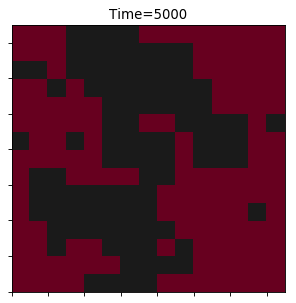

In [29]:
lattice = Ising()
lattice.run()

In [34]:
def initialize(N):   
#makes a lattice of a random configuration to see the change 
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def calcMag(config):
#calculate magnitization
    mag = np.sum(config)
    return mag

def calcEnergy(config):
#calculate energy
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

def flip(config, beta):
#monte carlo steps
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

In [35]:
## change these parameters for a smaller (faster) simulation 
nt      = 100         #  number of temperature points
N       = 16         #  size of the lattice
eqSteps = 1000       #  number of MC sweeps for equilibration
mcSteps = 1000       #  number of MC sweeps for calculation

T = np.linspace(1.5, 3.3, nt); 
E = np.zeros(nt)#creat empty storage for values
M = np.zeros(nt)
C = np.zeros(nt)
X = np.zeros(nt)

n1  = 1.0/(mcSteps*N*N)
n2  = 1.0/(mcSteps*mcSteps*N*N) #need to divide the values in order to properly scale them with regards to the ferromagnet.

for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initialize(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         #initialize the lattice
        flip(config, iT)           

    for i in range(mcSteps):
        flip(config, iT)           
        Ene = calcEnergy(config)#calculate energy and magnitization
        Mag = calcMag(config)        
        M1 = M1 + Mag
        E1 = E1 + Ene
        E2 = E2 + Ene*Ene
        M2 = M2 + Mag*Mag 
    #scale the energy and magnitization then use them to solve for suceptibiity and specific heat.
    M[tt] = n1*M1
    E[tt] = n1*E1
    X[tt] = (n1*M2 - n2*M1*M1)*iT
    C[tt] = (n1*E2 - n2*E1*E1)*iT2

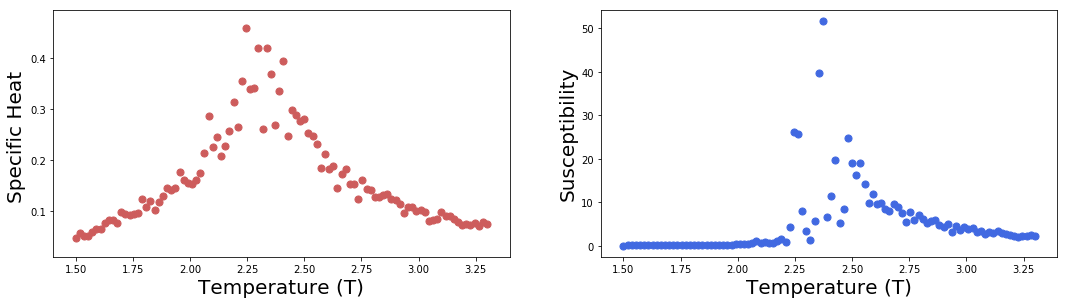

In [37]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    
sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');